### 한글폰트 설정

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
font_manager.findSystemFonts()


['C:\\Windows\\Fonts\\corbelz.ttf',
 'C:\\Windows\\Fonts\\consolaz.ttf',
 'C:\\Windows\\Fonts\\msyi.ttf',
 'C:\\Windows\\Fonts\\SitkaVF.ttf',
 'C:\\Windows\\Fonts\\arial.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\seguili.ttf',
 'C:\\Windows\\Fonts\\msjh.ttc',
 'C:\\Windows\\Fonts\\consola.ttf',
 'C:\\Windows\\Fonts\\Candarai.ttf',
 'C:\\Windows\\Fonts\\Candarab.ttf',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\Windows\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\seguisym.ttf',
 'C:\\Users\\EL0017\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.otf',
 'C:\\Windows\\Fonts\\trebucit.ttf',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\msyhl.ttc',
 'C:\\Windows\\Fonts\\georgiai.ttf',
 'C:\\Windows\\Fonts\\SitkaVF-Italic.ttf',
 'C:\\Windows\\Fonts\\segoeuii.ttf',
 'C:\\Windows\\Fonts\\verdanai.ttf',
 'C:\\Windows\\Fonts\\ebrimabd.ttf',
 'C:\\Windows\\Fonts\\calibrii.ttf',
 'C:\\Windows

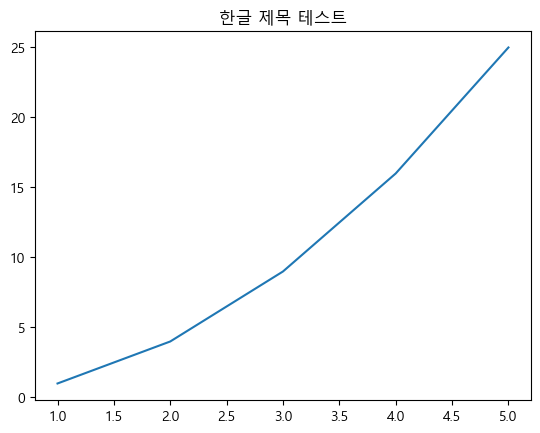

In [4]:
font_location = 'C:\\Windows\\Fonts\\malgun.ttf' # For Windows
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)


plt.title('한글 제목 테스트')
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])
plt.show()


## 데이터 불러오기

In [5]:
import pandas as pd
df = pd.read_csv(r'C:\Users\EL0017\Desktop\ㅋ\딥러닝\Data\titanic\tested.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 데이터셋 구조 확인 및 목표 설정

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Survived : 0 = 사망, 1 = 생존      
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

#### target = survived
#### feature(int,float) = Age, Pclass, Cabin
#### feature(범주형이라 인코딩해야하는 값) = Sex, Embarked (방 호수와 탑승지는 살짝 애매)

### 타겟 변수의 분포를 확인 

Text(0, 0.5, 'count')

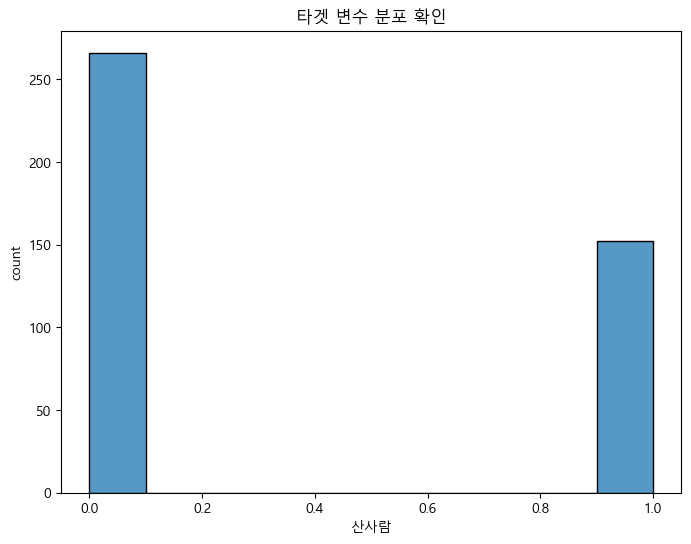

In [9]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['Survived'])
plt.title('타겟 변수 분포 확인')
plt.xlabel('산사람')
plt.ylabel('count')

죽은사람이 더 많음

### 상관관계 분석

#### 일단 str 형태의 데이터는 전부 제외, 범주형 데이터 원핫 인코딩

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df = df.drop('Name', axis=1)

1. onehotencoder 라이브러리를 사용한 원핫인코딩 (전체를 할때)
- one = OneHotEncoder(sparse_output=False) # sparse = False : 넘파이, True : 희소 행렬
- one.fit_transform(df)
2. get_dummies를 사용한 원핫 인코딩 (특정 열만 사용)
- df_encoded = pd.get_dummies(df, columns=['sex'])

In [44]:
df_encoded = pd.get_dummies(df, columns=['Sex','Pclass','Embarked'])

df_encoded

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,0,34.5,0,0,330911,7.8292,NaN,False,True,False,False,True,False,True,False
1,893,1,47.0,1,0,363272,7.0000,NaN,True,False,False,False,True,False,False,True
2,894,0,62.0,0,0,240276,9.6875,NaN,False,True,False,True,False,False,True,False
3,895,0,27.0,0,0,315154,8.6625,NaN,False,True,False,False,True,False,False,True
4,896,1,22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,NaN,0,0,A.5. 3236,8.0500,NaN,False,True,False,False,True,False,False,True
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,True,False,True,False,False,True,False,False
415,1307,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,False,True,False,False,True,False,False,True
416,1308,0,NaN,0,0,359309,8.0500,NaN,False,True,False,False,True,False,False,True


In [45]:
df_encoded.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,0,34.5,0,0,330911,7.8292,NaN,False,True,False,False,True,False,True,False
1,893,1,47.0,1,0,363272,7.0000,NaN,True,False,False,False,True,False,False,True
2,894,0,62.0,0,0,240276,9.6875,NaN,False,True,False,True,False,False,True,False
3,895,0,27.0,0,0,315154,8.6625,NaN,False,True,False,False,True,False,False,True
4,896,1,22.0,1,1,3101298,12.2875,NaN,True,False,False,False,True,False,False,True


In [47]:
df_encoded['Embarked_C'] = df_encoded['Embarked_C'].astype(int)
df_encoded['Embarked_Q'] = df_encoded['Embarked_Q'].astype(int)
df_encoded['Embarked_S'] = df_encoded['Embarked_S'].astype(int)
df_encoded['Sex_female'] = df_encoded['Sex_female'].astype(int)
df_encoded['Sex_male'] = df_encoded['Sex_male'].astype(int)
df_encoded['Pclass_1'] = df_encoded['Pclass_1'].astype(int)
df_encoded['Pclass_2'] = df_encoded['Pclass_2'].astype(int)
df_encoded['Pclass_3'] = df_encoded['Pclass_3'].astype(int)

In [48]:
df_encoded.isnull().sum()

PassengerId      0
Survived         0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Sex_female       0
Sex_male         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [49]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Sex_female   418 non-null    int64  
 9   Sex_male     418 non-null    int64  
 10  Pclass_1     418 non-null    int64  
 11  Pclass_2     418 non-null    int64  
 12  Pclass_3     418 non-null    int64  
 13  Embarked_C   418 non-null    int64  
 14  Embarked_Q   418 non-null    int64  
 15  Embarked_S   418 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 52.4+ KB


In [51]:
df_dropnull = df_encoded.drop(['Cabin', 'Ticket'], axis=1)
df_dropnull = df_dropnull.dropna(axis=0)
df_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Age          331 non-null    float64
 3   SibSp        331 non-null    int64  
 4   Parch        331 non-null    int64  
 5   Fare         331 non-null    float64
 6   Sex_female   331 non-null    int64  
 7   Sex_male     331 non-null    int64  
 8   Pclass_1     331 non-null    int64  
 9   Pclass_2     331 non-null    int64  
 10  Pclass_3     331 non-null    int64  
 11  Embarked_C   331 non-null    int64  
 12  Embarked_Q   331 non-null    int64  
 13  Embarked_S   331 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 38.8 KB


In [52]:
df_dropnull.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,0,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,893,1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,894,0,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,0,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,896,1,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


c:\Users\EL0017\anaconda3\envs\deep\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\EL0017\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


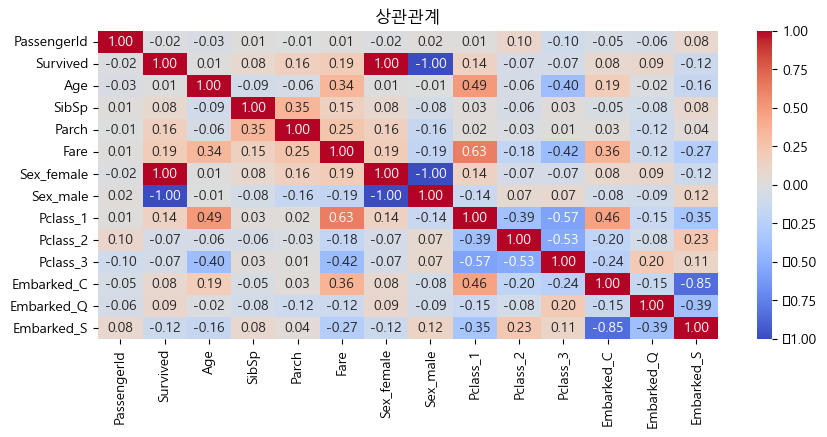

In [53]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(df_dropnull.corr(), annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('상관관계')
plt.show()

In [56]:
X = df_dropnull[['Age','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3']]
y = df_dropnull['Survived']

In [59]:
print(X.shape)
print(y.shape)

(331, 6)
(331,)


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(264, 6)
(67, 6)
(264,)
(67,)


In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
score = model.score(X_test,y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(score)
print(mse)
print(r2)
print(mae)

1.0
5.541774534744599e-27
1.0
6.044418696903259e-14
